## Pumpkin Varieties and Color

Let's look at the relationship between color and variety

In [1]:
#Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 
import pandas as pd
import numpy as np

pumpkins = pd.read_csv('US-pumpkins.csv')

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


We will express this as a binary: 'Orange' or 'Not Orange'. Our dataset also contains a'striped' category, but there are few instances of it, so we will not use it. It goes away once we remove the null values from the dataset.

In [2]:
#First, clean the data a bit, dropping null values and selecting only some of the columns:
from sklearn.preprocessing import LabelEncoder
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package', 'Date', 'Low Price', 'High Price', 'Most Low', 'Repack']
all_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
all_pumpkins.dropna(inplace=True)
new_pumpkins = all_pumpkins.apply(LabelEncoder().fit_transform)

In [3]:
all_pumpkins.info

<bound method DataFrame.info of       City Name       Package            Variety      Date  Low Price  \
2     BALTIMORE  24 inch bins        HOWDEN TYPE   9/24/16      160.0   
3     BALTIMORE  24 inch bins        HOWDEN TYPE   9/24/16      160.0   
4     BALTIMORE  24 inch bins        HOWDEN TYPE   11/5/16       90.0   
5     BALTIMORE  24 inch bins        HOWDEN TYPE  11/12/16       90.0   
6     BALTIMORE  36 inch bins        HOWDEN TYPE   9/24/16      160.0   
...         ...           ...                ...       ...        ...   
1694  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE   9/26/16      150.0   
1695  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE   9/27/16      150.0   
1696  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE   9/28/16      150.0   
1697  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE   9/29/16      150.0   
1698  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE   9/30/16      150.0   

      High Price    Origin Item Size   Color Repack  
2          160.0  DELAWARE       med 

In [5]:
all_pumpkins.describe()

,Low Price,High Price
count,991.000000,991.000000
mean,133.338042,145.452825
std,70.544611,78.493107
min,0.500000,0.500000
25%,107.500000,120.000000
50%,145.000000,150.000000
75%,175.000000,200.000000
max,440.000000,440.000000


Let's visualize the dataframe using Seaborn

Develop such a grid by creating a 'PairGrid' with our pumpkin data 'new_pumpkins' and then calling'map()':

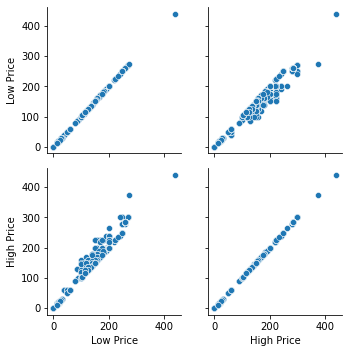

In [6]:
import seaborn as sns
g = sns.PairGrid(all_pumpkins)
g.map(sns.scatterplot)

### Use a swarm plot

Since Color is a binary category (Orange or Not), it's called 'categorical data' and needs 'a more specialized approach to visualization'. There are other ways to visualize the relationship of this category with other variables. 

You can visualize variables side-by-side with Seaborn plots.

1. Try a 'swarm' plot to show the distribution of values:

c:\ml\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ml\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Color', ylabel='Item Size'>

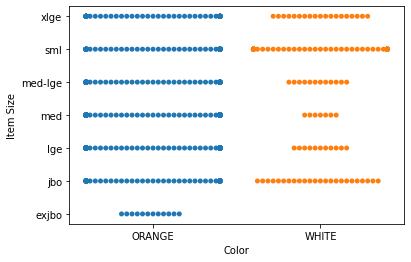

In [7]:
sns.swarmplot(x="Color", y="Item Size", data=all_pumpkins)

### Violin plot

A 'violin' type plot is useful as you can easily visualize the way that data in the two categories is distributed. Violin plots don't work so well with smaller datasets as the distribution is displayed more 'smoothly'.

1. As parameters `x=Color`, `kind="violin"` and call `catplot()`:

In [8]:
sns.catplot(x="Color", y="Item Size",
                kind="violin", data=all_pumpkins)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

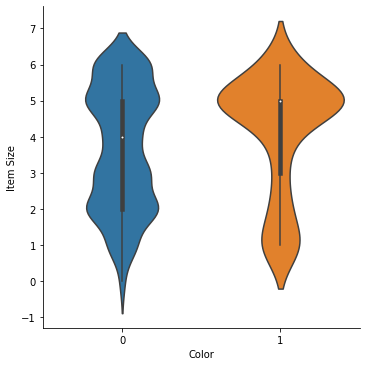

In [11]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

Now that we have an idea of the relationship between the binary categories of color and the larger group of sizes, let's explore logistic regression to determine a given pumpkin's likely color.

 **🧮 Show Me The Math**

Remember how linear regression often used ordinary least squares to arrive at a value? Logistic regression relies on the concept of 'maximum likelihood'

In [17]:
from sklearn.model_selection import train_test_split
    
Selected_features = ['Origin','Item Size','Variety','City Name','Package']
X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now you can train your model, by calling `fit()` with your training data, and print out its result:

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


In [19]:
# Predict the outcome for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = model.score(X_test, y_test)
print(accuracy)

0.8140703517587939


## Better comprehension via a confusion matrix

A '[confusion matrix](https://wikipedia.org/wiki/Confusion_matrix)' (or 'error matrix') is a table that expresses your model's true vs. false positives and negatives, thus gauging the accuracy of predictions.

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]], dtype=int64)

In Scikit-learn, confusion matrices Rows (axis 0) are actual labels and columns (axis 1) are predicted labels.

hat's going on here? Let's say our model is asked to classify pumpkins between two binary categories, category 'orange' and category 'not-orange'.

- If your model predicts a pumpkin as not orange and it belongs to category 'not-orange' in reality we call it a true negative, shown by the top left number.
- If your model predicts a pumpkin as orange and it belongs to category 'not-orange' in reality we call it a false negative, shown by the bottom left number. 
- If your model predicts a pumpkin as not orange and it belongs to category 'orange' in reality we call it a false positive, shown by the top right number. 
- If your model predicts a pumpkin as orange and it belongs to category 'orange' in reality we call it a true positive, shown by the bottom right number


## Visualize the ROC curve of this model

This is not a bad model; its accuracy is in the 80% range so ideally you could use it to predict the color of a pumpkin given a set of variables.

Let's do one more visualization to see the so-called 'ROC' score:

c:\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

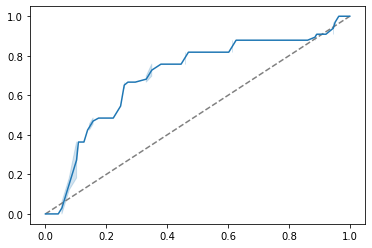

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1], color='gray', linestyle='--')
sns.lineplot(fpr, tpr)

In [22]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748
